# Exploring Quantum Computing: Demystifying Quantum Fourier Transformations: Unveiling the Math with Qiskit

![res/thumbnail2.png](res/thumbnail2.png)

Figure [1]: tbumbnail

In [6]:
#prereq
%pip install -q qiskit qiskit-aer numpy matplotlib pylatexenc

Note: you may need to restart the kernel to use updated packages.


Originally posted on [Medium](https://medium.com/@marcell.ujlaki/exploring-quantum-computing-demystifying-quantum-fourier-transformations-unveiling-the-math-with-5d74f3f8025f 'Exploring Quantum Computing: Demystifying Quantum Fourier Transformations: Unveiling the Math with Qiskit')

# Hi

Yet another blog post on the Quantum Fourier transform (QFT) to add to the very many great ones 🙌️. As I was learning and preparing scripts to find the prime factors of an n-bit integer (hello Shor👋️), I came across this very fascinating operation. However, the deeper I dived into it, the more I had to google and the more sources I had to read. The goal was to gather my findings into a single source, and in this write-up, we'll delve into this topic, and I will show you a Python script capable of transforming any number from computational basis to the Fourier basis.

TL;DR
In this chapter I will only cover:
- A few words about Discrete Fourier Transformation (DFT)
- The Quantum Fourier Transformation and the math behind it 
- Python code implementing QFT for N qubits


One another thing I would like to highlight. If the paragraph is oddly satisfyingly worded and pleasant read, then yes, the LLMs were there to help me.

---

The DFT and QFT both aim to study signals to find their frequency parts. However, they work in very different ways. DFT can be calculated by regular computers and deals with specific data points, while QFT uses qubits in quantum computing. QFT is especially faster for some calculations compared to classical methods. This makes it crucial for quantum tasks like cryptography and optimization.

## Discrete Fourier Transformation

I would like to give some words about the Fourier Transformation. The Fourier Transform is a fundamental mathematical operation in classical computing used to analyze functions or signals in the time or spatial domain and convert them into the frequency domain. It decomposes a function into its constituent frequencies, revealing the frequency components present in the original signal. It operates on classical bits and utilizes algorithms like the Fast Fourier Transform (FFT) to efficiently compute these transformations on classical computers. 


![DFT.png](res/DFT.png)

Figure [2]: Discrete Fourier Transform

The Discrete Fourier Transform equation:

![DFT-eq.png](res/DFT-eq.png)

Figure [3]: Discrete Fourier Transform equation

Where:
- N=number of samples
- k=frequency 𝑘∈[0,𝑁−1]
- n=space, current sample

In cybersecurity, for example, you could detect C2 communication by implementing Fourier analysis, which can be used to identify periodic beaconing activity. But which threat actor uses non-random time windows for command-and-control heartbeats?

![network-signal.png](res/network-signal.png)

Figure [4]: Rough visualization of periodic beaconing activity hidden in legitimate traffic

## Quantum Fourier Transformation

The Discrete Fourier Transform and the Quantum Fourier Transform are both mathematical transformations used to analyze and manipulate signals and data, but they operate in different domains and have distinct characteristics due to their classical and quantum nature. QFT manipulates quantum bits (qubits) to transform quantum states into a superposition of frequency components. QFT capitalizes on quantum parallelism, performing operations on quantum states that can lead to exponential speedups for specific problems like factorization and certain optimization tasks. Unlike DFT, which can be executed on classical hardware, QFT requires quantum hardware or simulators capable of implementing quantum gates to operate on qubits, showcasing the distinction between their classical and quantum natures, respectively.

In the computational basis, binary numbers are represented by qubit flips at specific intervals, whereas in the Fourier basis, rotations around the Z-axis determine the representation. Each qubit's rotation angle signifies the number to be stored and rotations are calculated proportionally. The best visual representation of the operation is made by IBM's Qiskit team:

![QFT-final.gif](res/QFT-final.gif)

Figure []:from Quantum Protocols and Quantum Algorithms - Counting in the Fourier basis - https://github.com/Qiskit/textbook/tree/main/notebooks/ch-algorithms

### QFT on a single qubit

The discrete Fourier transform acts on a vector $(x_0, ..., x_{N-1})$ and maps it to the vector $(y_0, ..., y_{N-1})$ according to the following formula:
$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

Figure [5]: Quantum Fourier Transform equation

where: 

- $x_j$ are the input quantum states, where $j$ indexes the different states in the input quantum system.
- $N$ represents the total number of quantum states or the dimensionality of the quantum system.
- $\omega_N$ is a complex root of unity that is related to the $N$-th root of unity. It's used to define the phase relationships between different quantum states during the transformation.

and:

$$\omega_N = e^{2\frac{\pi i}{N}} \space \Rightarrow \space \omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$$

Figure [6]: $N$-th root of unity, Omega


The Quantum Fourier Transform (QFT) is a method that changes between two important bases in quantum computing: the computational basis and the Fourier basis. By using the H-gate (Hadamard) as a single-qubit QFT, it moves states from the Z-basis—for instance, |0⟩ and |1⟩—to the X-basis, which is shown as |+⟩ and |−⟩. This process applies to states with multiple qubits as well, where each state in the computational basis has its corresponding state in the Fourier basis. 

$$
|\text{State in Computational Basis}\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{State in Fourier Basis}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$

Figure [7]:

So lets see written down, how it acts on a single qubit state if the state is defined as $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$. According to our previously introduced equation:

$$ 
\begin{aligned}
y_k & = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk} = \frac{1}{\sqrt{2}}\left(\alpha \omega_2^{0k} + \beta \omega_2^{1k}\right) \space && \bigg \vert\space\text{since}\space N = 2, x_0 = \alpha, x_1 = \beta
\\
& = \frac{1}{\sqrt{2}}\left(\alpha (-1)^{0k} + \beta (-1)^{1k}\right) \space && \bigg \vert\space\text{since}\space \omega_2 = e^{2\pi i / 2} = e^{\pi i} = -1
\\
y_k & = \frac{1}{\sqrt{2}}\left(\alpha + (-1)^k \beta \right) \space && \bigg \vert\space\text{since}\space (-1)^{0k} = 1
\\
\end{aligned}
$$
$$
\begin{aligned}
y_0 & = \frac{1}{\sqrt{2}}(\alpha + \beta)
\\
y_1 & = \frac{1}{\sqrt{2}}(\alpha - \beta)
\\
U_{QFT}\vert\psi\rangle & = \frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle
\end{aligned}
$$
Figure [8]: QFT applied on a single qubit

And we can see, the result is exactly the same if we apply a Hadamard operator ($H$) on the qubit:
$$
H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\\
\\
$$

$$
H\vert\psi\rangle = \frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle 
\equiv \tilde{\alpha}\vert 0 \rangle + \tilde{\beta}\vert 1 \rangle
$$

Figure [9]: Hadamard operator applied on a single qubit

![single-qbit-qft.gif](res/single-qbit-qft.gif)

Figure [8]: Applying Hadamard-gate (H-gate) on $|0\rangle$

### QFT on N qubits

Okay, so the next question is, what does the QFT achieve for larger values of N? Let's consider |x⟩ ($\vert x \rangle$), where |x⟩ = |x₁...xₙ⟩ ($\vert x \rangle = \vert x_1\ldots x_n \rangle$), and apply the previously mentioned transformation for N = 2ⁿ ($N=2^n$, $QFT_N$), denoted as $QFT_N$, which will be the following:

$$
\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle
\end{aligned}
$$

Figure [9]: QFT for larger N values 

Lets conduct an in-depth analysis and deconstruction of the ensuing equation. What we know is:

$$
\begin{aligned}
QFT_N\vert x \rangle 
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle 
= \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i \frac{xy}{2^n}} \vert y \rangle \space&&\bigg \vert\space\text{since}\space\omega_N^{xy} = e^{2\pi i \frac{xy}{N}} \:\text{and}\: N = 2^n 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i x \left(\sum_{k=1}^n\frac{y_k}{2^k}\right)} \vert y_1 \ldots y_n \rangle \space&&\bigg\vert\space\text{rewriting in fractional binary notation}\: y = y_1\ldots y_n, \frac{y}{2^n}
= \sum_{k=1}^n \frac{y_k}{2^k} 
\end{aligned}
$$

Figure [10]: explaining QFT

But what is fractional binary notation? Fractional binary notation involves expressing a number using powers of 2 in binary form. Whit that said, let's just take an example, the number 5, which is 101 in binary notaiton. If we do a binary expansion of 5, we get:

$$ 5 = 2^2 \times 1 + 2^1 \times 0 + 2^0 \times 1. $$

Figure [11]: explaining the binary notation 
which means, in general, we have:

$$ y = \sum_{k=0}^{n-1} 2^k y_k. \quad $$

Figure [12]: the value y in general 
Similarly, $\frac{y}{2^n}$ is an integer $y$ divided by $2^n$, so it is a fraction, which also has a binary expansion in terms of fractions $2^{-k}$. In binary terms, dividing by $2^n$ effectively shifts the binary point to the left by $n$ places, making the digit at index $k$ represent $2^{-k}$. The index $k$ now ranges from 1 to $n$ because the first digit after the binary point represents $2^{-1}$, and it continues up to $2^{-n}$ for the $n$th digit after the binary point:

$$ \frac{y}{2^n} = \sum_{k=1}^{n} 2^{-k} y_k. \quad$$ 

Figure [13]: binary expansion in terms of fractions 

Okay, maybe it seems it is an unnecessary step, but what we discovered is essentially very useful to understand what is really happening. Let's keep breaking it down by looking at the expansion of an exponential term within fractional binary notation:

$$
e^{2 \pi i \left(\frac{y}{2^n}\right) x} = \prod_{k=1}^n e^{2 \pi i \frac{y_k}{2^k} x}
$$

Figure [14]: expanding exponential term in the context of fractional binary notation.

Now we can see that the complex exponential term can be expressed as a product of individual terms, which will be corresponding to each bit $y_k$ of $y$ when interpreted as a fraction of $2^k$. Let's continue:

$$
\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^n e^{2 \pi i x \frac{y_k}{2^k} } \vert y_1 \ldots y_n \rangle \space && \bigg\vert\space\text{ after expanding the exponential of a sum to a product of exponentials}
\\
& = \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n  \left(\vert0\rangle + e^{2 \pi i x /2^k } \vert1\rangle \right)\space && \bigg\vert\text{ after rearranging the sum and products, and expanding} 
\sum_{y=0}^{N-1} = \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}\ldots\sum_{y_n=0}^{1}
\end{aligned}
$$
$$
\Downarrow
$$
$$
\begin{aligned}
QFT_N\vert x \rangle = \frac{1}{\sqrt{N}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
\end{aligned}
$$

Figure [15]: explaining QFT

It was a bit challenging, but in order to further enhance our understanding, we might consider bringing up a concrete example (up to this point we've only used the numbers 0, 1 and 2, but don't worry, that won't change much with my example 😄). Let's expand the product of complex exponential within the $QFT$ expression for $N = 4$ (do not forget, N = 2ⁿ, N = 4 = 2², n = 2). What we know so far:

$$
\begin{aligned}
QFT_N\vert x \rangle & = 
\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^n e^{2 \pi i x \frac{y_k}{2^k} } \vert y_1 \ldots y_n \rangle 
= \frac{1}{\sqrt{4}} \sum_{y=0}^{3} \prod_{k=1}^2 e^{2 \pi i x \frac{y_k}{2^k} } \vert y_1  y_2 \rangle \space && \bigg \vert \space \text{since } N = 4 \text{ and } n = 2
\\
& = \frac{1}{\sqrt{4}} \left(\prod_{k=1}^2 e^{2 \pi i x \frac{y_k}{2^k} } \vert 00 \rangle + \prod_{k=1}^2 e^{2 \pi i x \frac{y_k}{2^k} } \vert 01 \rangle + \prod_{k=1}^2 e^{2 \pi i x \frac{y_k}{2^k} } \vert 10 \rangle + \prod_{k=1}^n e^{2 \pi i x \frac{y_k}{2^k} } \vert 11 \rangle \right)
\\
& = \frac{1}{\sqrt{4}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2^1}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) \space && \bigg\vert \text{or }\frac{1}{\sqrt{4}} \bigotimes_{k=1}^2  \left(\vert0\rangle + e^{\frac{2 \pi i}{2^k} x } \vert1\rangle \right)
\end{aligned}
$$

Figure [16]: QFT for number 4
Expanding the product of complex exponentials for each $n$-qubit state $\vert y_1 y_2 \rangle$:

1. For $\vert 00 \rangle$:

$$
\begin{aligned}
\prod_{k=1}^n e^{2 \pi i x \frac{y_k}{2^k} } \vert 00 \rangle &= e^{2 \pi i x \cdot \frac{0}{2^1}} \cdot e^{2 \pi i x \cdot \frac{0}{2^2}} \vert 00 \rangle \\
&= e^{0} \cdot e^{0} \vert 00 \rangle \\
&= \vert 00 \rangle
\end{aligned}
$$

Figure [17]: state of |00⟩

2. For $\vert 01 \rangle$:

$$
\begin{aligned}
\prod_{k=1}^n e^{2 \pi i x \frac{y_k}{2^k} } \vert 01 \rangle &= e^{2 \pi i x \cdot \frac{0}{2^1}} \cdot e^{2 \pi i x \cdot \frac{1}{2^2}} \vert 01 \rangle \\
&= e^{0} \cdot e^{2 \pi i \frac{x}{2}} \vert 01 \rangle \\
&= e^{2 \pi i \frac{x}{2}} \vert 01 \rangle
\end{aligned}
$$

Figure [18]: state of |01⟩

3. For $\vert 10 \rangle$:

$$
\begin{aligned}
\prod_{k=1}^n e^{2 \pi i x \frac{y_k}{2^k} } \vert 10 \rangle &= e^{2 \pi i x \cdot \frac{1}{2^1}} \cdot e^{2 \pi i x \cdot \frac{0}{2^2}} \vert 10 \rangle \\
&= e^{2 \pi i \frac{x}{2}} \cdot e^{0} \vert 10 \rangle \\
&= e^{2 \pi i \frac{x}{2}} \vert 10 \rangle
\end{aligned}
$$

Figure [19]: state of |10⟩

4. For $\vert 11 \rangle$:

$$
\begin{aligned}
\prod_{k=1}^n e^{2 \pi i x \frac{y_k}{2^k} } \vert 11 \rangle &= e^{2 \pi i x \cdot \frac{1}{2^1}} \cdot e^{2 \pi i x \cdot \frac{1}{2^2}} \vert 11 \rangle \\
&= e^{2 \pi i \frac{x}{2}} \cdot e^{2 \pi i \frac{x}{4}} \vert 11 \rangle \\
&= e^{3 \pi i \frac{x}{4}} \vert 11 \rangle
\end{aligned}
$$

Figure [20]: state of |11⟩

So, the expanded $QFT$ expression for $N = 4$ with the product of complex exponential yields to:

$$
\frac{1}{\sqrt{4}} \left(\vert 00 \rangle + e^{2 \pi i \frac{x}{4}} \vert 01 \rangle + e^{2 \pi i \frac{x}{2}} \vert 10 \rangle + e^{3 \pi i \frac{x}{4}} \vert 11 \rangle \right)
$$

Figure [17]: final state of the QFT operation

This represents the $QFT$ operation acting on an $n$-qubit state $\vert x \rangle$ when $N = 4$. Now, since we understand what is happening behind the scenes, we can head into code wrighting and implementing quantum circuits. 


## QFT Circuit

Now, as we are familiar with the essential math behind the QFT, it is time to write the code in python. It is recommended to use Jupyter Notebook instead of the native script for its interactive features, immediate visualization, and documentation options, allowing for smoother code execution.

The script will define three crucial functions:

- `qft_rotations`: Performs the internal rotations of QFT on the first `n` qubits in a quantum circuit.
- `swap_registers`: Handles the qubit swaps at the end of the QFT operation.
- `qft`: Calls the rotations and swaps to execute the complete QFT on the first `n` qubits in a circuit.

The `qc_init` function initializes the quantum circuit by setting up the initial states based on a given number. It uses the binary representation of the number to apply X gates to corresponding qubits. Remember, in Qiskit, the least significant bit holds the lowest index (0), consequently, the circuit will appear mirrored horizontally. Unfortunately, I will not explain the reason why we need the rotations and swap registers due to the length of the blog. Perhaps in a future write-up, I'll cover the details and explanations. 🤷️

The following modules will be needed:
- qiskit
- qiskit-aer
- numpy
- matplotlib 
- pylatexenc

The code:

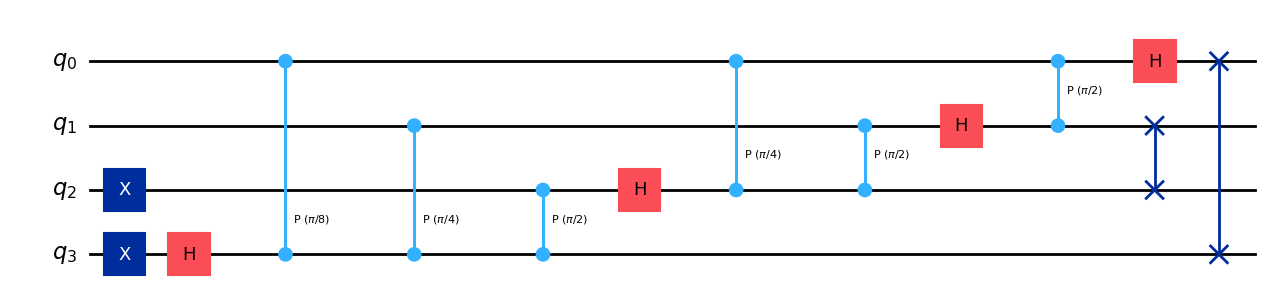

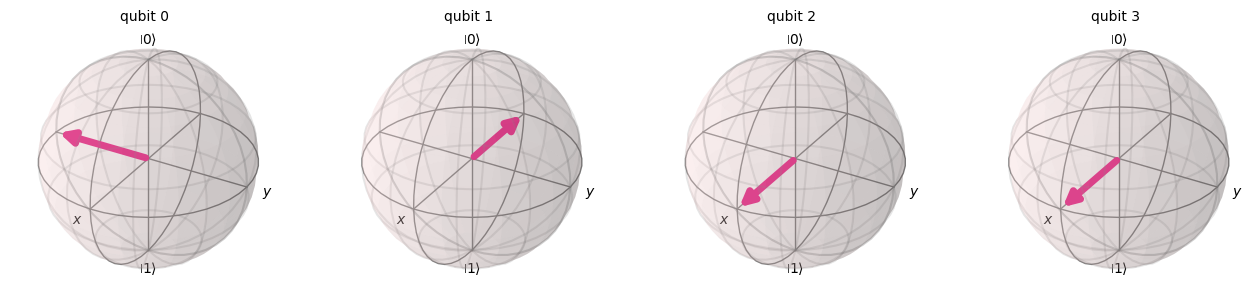

<IPython.core.display.Latex object>

In [13]:
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import circuit_drawer

def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n) # CROT from qubit n to the actual qubit
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

def qc_init(number):
    binary = bin(number)[2:]
    qubits = len(binary)

    qc = QuantumCircuit(qubits)

    # Apply X gate to qubits based on binary representation
    for index, bit in enumerate(reversed(binary)):
        if bit == '1':
            qc.x(index)
    return qc, qubits

number = 12

qc, qubits = qc_init(number)
qft(qc,qubits)
display(qc.draw('mpl',style="iqp"))

# Save the output
quantum_circuit = circuit_drawer(qc, output='mpl',style="iqp")
quantum_circuit.savefig('res/quantum_circuit.png')

# Start the simulation

sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
display(plot_bloch_multivector(statevector))
display(statevector.draw('latex'))

Figure [24]: output of a python script for the number 12

The script will draw the quantum circuit with matplotlib to visualize the operations and the generated quantum circuit diagram (`quantum_circuit.png`), which will show the sequence of quantum gates and operations. Moreover, the state vector visualizations with Bloch sphere representations offer insights into the quantum state after the QFT application. These diagrams help to understand the transformation of the quantum state during the QFT process. Another example, for the number 669:

![quantum_circuit_669.png](res/quantum_circuit_669.png)

$$
\begin{aligned}
\frac{1}{32} |0000000000\rangle+(-0.0178368983 - 0.0256594536 i) |0000000001\rangle+(-0.0108880838 + 0.0292918441 i) |0000000010\rangle+(0.0302663154 - 0.0077789877 i) |0000000011\rangle+(-0.0236627765 - 0.0204116513 i) |0000000100\rangle+(-0.0032538011 + 0.0310801428 i) |0000000101\rangle + \ldots +(-0.0032538011 - 0.0310801428 i) |1111111011\rangle+(-0.0236627765 + 0.0204116513 i) |1111111100\rangle+(0.0302663154 + 0.0077789877 i) |1111111101\rangle+(-0.0108880838 - 0.0292918441 i) |1111111110\rangle+(-0.0178368983 + 0.0256594536 i) |1111111111\rangle
\end{aligned}
$$


1/32 |0000000000⟩+(-0.0178368983 - 0.0256594536 i) |0000000001⟩+(-0.0108880838 + 0.0292918441 i) |0000000010⟩+(0.0302663154 - 0.0077789877 i) |0000000011⟩+(-0.0236627765 - 0.0204116513 i) |0000000100⟩+(-0.0032538011 + 0.0310801428 i) |0000000101⟩ + ... +(-0.0032538011 - 0.0310801428 i) |1111111011⟩+(-0.0236627765 + 0.0204116513 i) |1111111100⟩+(0.0302663154 + 0.0077789877 i) |1111111101⟩+(-0.0108880838 - 0.0292918441 i) |1111111110⟩+(-0.0178368983 + 0.0256594536 i) |1111111111⟩




Obviously, you can experiment with larger numbers, but do keep in mind the memory limitations as it can expand quite rapidly! 😄

# Conclusion

Understanding and using the Quantum Fourier Transform via Qiskit helps us understand how these quantum algorithms work. The code example is just the start, it shows how QFT can store info based on frequencies, which could be handful in how we handle signals for example.

QFT is a game-changer in a bunch of quantum computing fields. It's a big deal in cryptography with Shor's algorithm, helps speed up database searches, nails precise quantum simulations, and fixes errors in quantum computing.
Hope you liked it!

bye


# Sources

[1] - What is the Fourier Transform and how is it used in Image processing?, STEMporium, https://stemporium.blog/2023/04/13/what-is-the-fourier-transform-and-how-is-it-used-in-image-processing

[2] - Discrete Fourier Transform (DFT), Python Numerical Methods, https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

[3] - Quantum Fourier Transform, IBM Qiskit, https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-fourier-transform.ipynb

[4] - Binary Fractions, Eletronics Tutorials, https://www.electronics-tutorials.ws/binary/binary-fractions.html

[5] - Quantum Fourier Transform,  Ivan S. Oliveira, ... Eduardo R. deAzevedo, in NMR Quantum Information Processing, 2007, https://www.sciencedirect.com/topics/mathematics/quantum-fourier-transform